In [1]:
import pandas as pd

In [2]:
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

In [3]:
df=pd.read_csv('ratings.csv')
df.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [4]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [6]:
n_movies=df['movieId'].nunique()
n_users=df['userId'].nunique()
print(f'Number of Unique Movie: {n_movies}')
print(f'Number of Unique Users: {n_users}')

Number of Unique Movie: 9724
Number of Unique Users: 610


In [7]:
available_ratings=df['rating'].count()
total_ratings = n_movies*n_users
sparsity= ((total_ratings-available_ratings)/total_ratings)*100
print(f'Sparsity of matrix is: {sparsity}')

Sparsity of matrix is: 98.30003169443864


<AxesSubplot:>

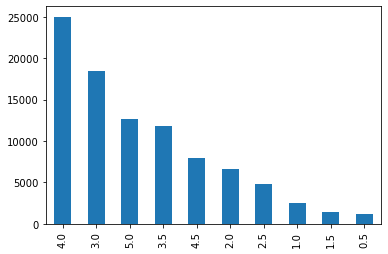

In [12]:
df['rating'].value_counts().plot(kind='bar')

In [9]:
filter_movies=df['movieId'].value_counts() > 3
filter_movies=filter_movies[filter_movies].index.tolist()

In [10]:
filter_users=df['userId'].value_counts() > 3
filter_users=filter_users[filter_users].index.tolist()

In [11]:
print(f'Original Shape : {df.shape}')
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print(f'New Shape : {df.shape}')


Original Shape : (100836, 3)
New Shape : (92394, 3)


In [13]:
cols= ['userId', 'movieId', 'rating']

In [14]:
reader=Reader(rating_scale=(0.5,5))
data=Dataset.load_from_df(df[cols], reader)

In [15]:
trainset=data.build_full_trainset()
antiset=trainset.build_anti_testset()

In [16]:
algo = SVD(n_epochs=25, verbose=True)

In [17]:
cross_validate(algo, data, measures=['MAE','RMSE'], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

{'test_mae': array([0.65611027, 0.66280523, 0.66351049, 0.66362079, 0.65698089]),
 'test_rmse': array([0.85873953, 0.86487607, 0.86536439, 0.86287136, 0.8583245 ]),
 'fit_time': (6.764875411987305,
  7.3765339851379395,
  7.129223585128784,
  7.449145078659058,
  6.879065036773682),
 'test_time': (0.35022807121276855,
  0.1655588150024414,
  0.2533597946166992,
  0.16256403923034668,
  0.22540736198425293)}

In [ ]:
predictions=algo.test(antiset)

In [ ]:
predictions[0]

In [23]:
from collections import defaultdict

def get_top_n(predictions, n):
    top_n=defaultdict(list)
    for uid, iid, _, est, _ in predictions:
        top_n[uid].append((iid,est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key= lambda x:x[1], reverse= True)
        top_n[uid]= user_ratings[:n]
    return top_n
top_n=get_top_n(predictions, 3)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 48516, 720]
2 [720, 2959, 7361]
3 [6711, 1193, 3429]
4 [1207, 720, 1270]
5 [1225, 260, 593]
6 [54001, 912, 1270]
7 [246, 914, 2716]
8 [720, 7153, 1203]
9 [1208, 1225, 58559]
10 [1193, 908, 1097]
11 [750, 111, 858]
12 [6, 50, 527]
13 [1196, 1148, 899]
14 [912, 1276, 1213]
15 [1213, 912, 838]
16 [1104, 2804, 1265]
17 [1267, 720, 177593]
18 [741, 1945, 3266]
19 [1208, 1217, 1222]
20 [79132, 912, 1203]
21 [86781, 5690, 4007]
22 [2912, 122882, 1089]
23 [58559, 527, 898]
24 [1148, 904, 1249]
25 [50, 457, 1197]
26 [720, 1237, 1104]
27 [318, 1233, 1208]
28 [79132, 177593, 2019]
29 [1223, 1199, 142488]
30 [50, 356, 608]
31 [858, 1237, 1104]
32 [2571, 2959, 1223]
33 [1196, 720, 750]
34 [38061, 50, 177593]
35 [58559, 720, 750]
36 [50, 1235, 916]
37 [50, 116897, 741]
38 [778, 1223, 1213]
39 [1223, 110, 750]
40 [527, 2571, 1203]
41 [318, 527, 308]
42 [1249, 6502, 48516]
43 [50, 101, 260]
44 [1136, 1197, 1228]
45 [1203, 318, 115149]
46 [750, 720, 246]
47 [68954, 1242, 56782]
48 [318, 260, 35